In [2]:
# --- import libraries --- #
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# --- reading csv file --- #
df = pd.read_csv("/content/cinemaTicket_Ref.csv")

## Data validation

In [7]:
df.head(5)

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [33]:
df["timestamp"] = pd.to_datetime(df["date"])

In [47]:
df["day_of_week"] = df["timestamp"].dt.dayofweek

In [48]:
def verify_null_counts(data):
  """
  Verify null counts and null percent
  """
  total_rows = len(data)
  null_counts = data.isnull().sum()

  null_percent = (null_counts / total_rows) * 100
  null_data = null_counts[null_counts > 0 ]

  for col in null_data.index :

        print(f"{col} : {null_data[col]} ({null_percent[col]:.2f}%)")

In [28]:
verify_null_counts(df)

occu_perc : 125 (0.09%)
capacity : 125 (0.09%)


In [50]:
df = df.dropna()

## EDA

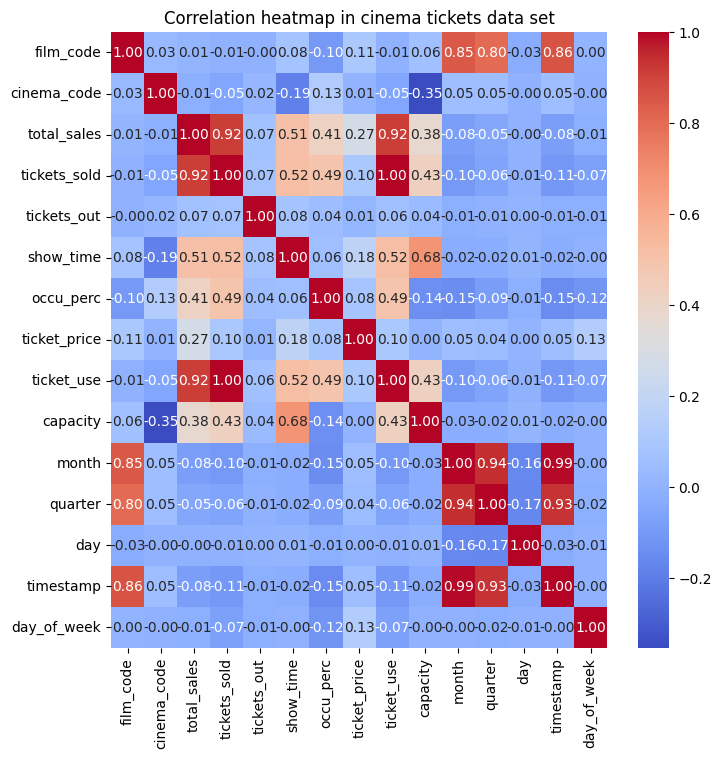

In [51]:
def correlation_mapping(data):
  """
  Correlation heatmap between the columns
  """

  plt.figure(figsize=(8,8))

  corr = data.corr()
  sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm")
  plt.title("Correlation heatmap in cinema tickets data set")
  plt.show()

correlation_mapping(df)

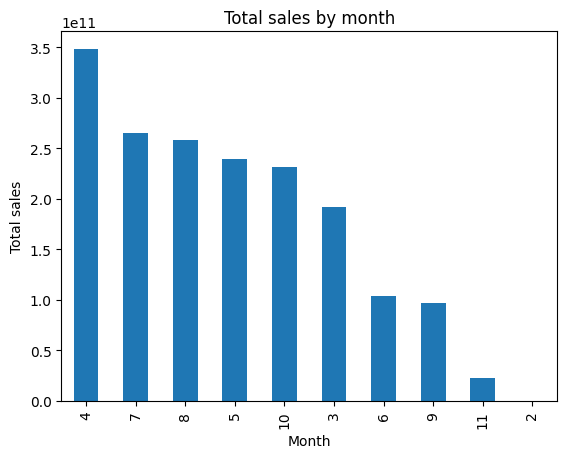

In [46]:
groupedbysells = df.groupby("month")["total_sales"].sum().sort_values(ascending=False)
groupedbysells.plot(kind="bar")
plt.title("Total sales by month")
plt.xlabel("Month")
plt.ylabel("Total sales")
plt.show()

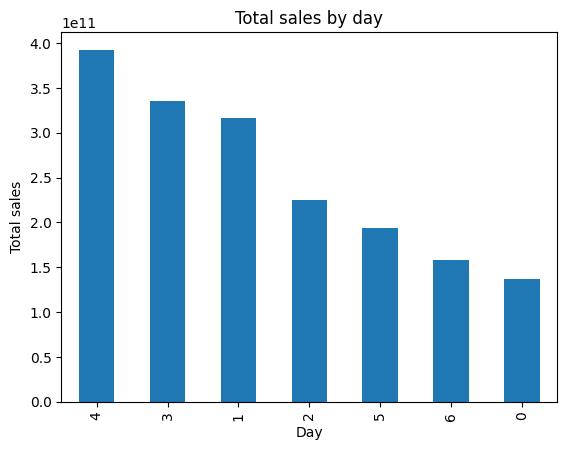

In [53]:
grouby_day = df.groupby("day_of_week")["total_sales"].sum().sort_values(ascending=False)
grouby_day.plot(kind="bar")
plt.title("Total sales by day")
plt.xlabel("Day")
plt.ylabel("Total sales")
plt.show()

In [55]:
#sns.pairplot(df,hue="total_sales")
#plt.show()

In [63]:
#sns.boxplot(data=df)
#plt.figure(figsize=(10000000,10000000))
#plt.show()

## Feature engineering

## Machine Learning

In [ ]:
!pip install catboost lightgbm xgboost --quiet